In [0]:
# Importing the Libraries

import numpy as np
import pandas as pd
import pickle
import seaborn as sns

# Import ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [74]:
!pip install tensorflow==1.14

In [75]:
# Mounting the Drive So as to share the Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Loading the Data from Drive mounted based on the 1st cell

df = pd.read_excel('/content/drive/My Drive/SPS_Dt/Bank Marketing Dataset.xlsx', sheet_name="bank-additional-full")

In [77]:
# Show Random 10 Observations

df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14346,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,111,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
28815,33,technician,married,professional.course,no,no,yes,cellular,apr,thu,383,3,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,no
39800,52,admin.,divorced,university.degree,no,yes,no,telephone,jun,tue,36,1,999,0,nonexistent,-1.7,94.055,-39.8,0.702,4991.6,no
15883,33,admin.,single,university.degree,no,yes,no,cellular,jul,mon,366,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
38720,33,admin.,married,university.degree,no,yes,no,cellular,nov,tue,344,2,3,1,success,-3.4,92.649,-30.1,0.715,5017.5,yes
11880,33,admin.,single,high.school,no,yes,yes,telephone,jun,fri,15,26,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
22018,45,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,wed,395,6,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
17565,41,services,married,high.school,unknown,no,yes,telephone,jul,mon,187,11,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
30753,40,management,married,university.degree,no,yes,no,cellular,may,tue,459,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
2478,42,admin.,divorced,university.degree,no,no,no,telephone,may,tue,434,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [78]:
# Show Descriptive Statistics

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [79]:
# Show Dataset Information

df.dtypes.sort_values()

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

In [80]:
# Check Missing Values and their Percentages in the Dataset

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_per = (missing_data/len(df)) * 100
pd.concat([missing_data, missing_per], keys=["Missing Data", "Missing%"], axis=1)

,Missing Data,Missing%
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


In [0]:
# Drop Subsets

df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [0]:
# Replace Education Values Directly

df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

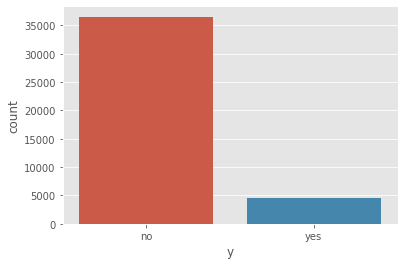

In [83]:
# Plot Distribution of Target values

sns.countplot(x='y', data=df)

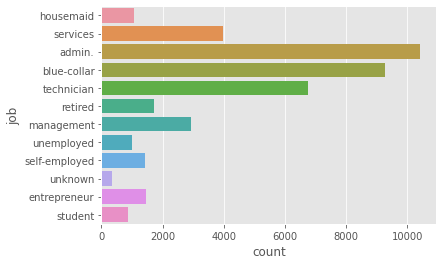

In [84]:
# Show Distribution of Jobs

sns.countplot(y='job', data=df)

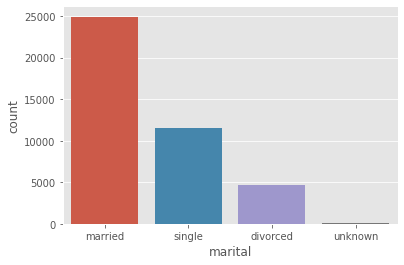

In [85]:
# Plot Marital Status

sns.countplot(x='marital', data=df)


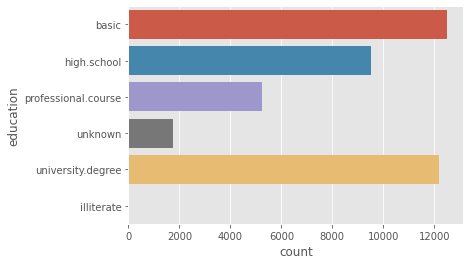

In [86]:
# Plot Education Values

sns.countplot(y='education', data=df)

In [0]:
# Data Preprocessing

# Encoding Categorical Features to Numeric Values
le = preprocessing.LabelEncoder()

# Transform Job
df.job = le.fit_transform(df.job)

# Transform Marital Status
df.marital = le.fit_transform(df.marital)

# Transform Education
df.education = le.fit_transform(df.education)

# Transform Housing Status
df.housing = le.fit_transform(df.housing)

# Transform Loan Status
df.loan = le.fit_transform(df.loan)

# Transform Poutcome Status
df.poutcome = le.fit_transform(df.poutcome)


In [88]:
# Check First 5 rows of Dataframe

df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [89]:
# Check Shape of Dataframe

df.shape

(41188, 15)

In [0]:
# Split Independent and Dependent Variables

X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [0]:
# Perform Train Test Split

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
# Plot the Training Set Shape

x_train.shape, y_train.shape

((30891, 14), (30891,))

In [93]:
# Plot the Test Set Shape

x_test.shape, y_test.shape

((10297, 14), (10297,))

## Training The Model

In [94]:
# Logistic Regression

model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)
prediction=model.predict(x_test)

# Check the Accuracy
from sklearn.metrics import accuracy_score
print("The Accuracy of Logistic Regression Model is:", accuracy_score(y_test, prediction))

The Accuracy of Logistic Regression Model is: 0.8994852869767893


In [95]:
# Plot Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
# sns.heatmap(confusion_matrix, annot= True)

[[9059   85]
 [ 950  203]]


In [96]:
# Support Vector Classifier

from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

# Check the Accuracy
from sklearn.metrics import accuracy_score
print("The Accuracy of Support Vector Classifier Model is:", accuracy_score(y_test, pred))

The Accuracy of Support Vector Classifier Model is: 0.8880256385354958


In [97]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict = rfc.predict(x_test)

# Check the Accuracy
from sklearn.metrics import accuracy_score
print("The Accuracy of Random Forest Classifier Model is:", accuracy_score(y_test, predict))


The Accuracy of Random Forest Classifier Model is: 0.8901621831601437


In [0]:
# Artificial Neural Networks

from keras.models import Sequential
from keras.layers import Dense

In [0]:
x_train_keras = np.array(x_train)
y_train = y_train.map({'no':0, 'yes':1})
y_test = y_test.map({'no':0, 'yes':1})
y_train_keras = np.array(y_train)

In [0]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
r = model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=20, batch_size=128, shuffle=True)

Epoch 1/20
30891/30891 [==============================] - 1s 18us/step - loss: 0.3527 - acc: 0.8871
Epoch 2/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 3/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 4/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 5/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 6/20
30891/30891 [==============================] - 0s 10us/step - loss: 0.3526 - acc: 0.8871
Epoch 7/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 8/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 9/20
30891/30891 [==============================] - 0s 9us/step - loss: 0.3526 - acc: 0.8871
Epoch 10/20
30891/30891 [==============================] - 0s 10us/step - loss: 0.3526 - acc: 0.8871
Epoch 

In [107]:
# Model Evaluation

scores = model.evaluate(np.array(x_test), np.array(y_test))

10297/10297 [==============================] - 0s 19us/step


In [111]:
print("The Accuracy is :\n %.2f%%" % (scores[1]*100))


The Accuracy is :
 88.80%
